# `Russian Troll Tweets Part-02`

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)


<font size=5>**`Help Support The Channel: Patreon @mrfugudatasci`**</font>
    
**`Or Consider: Buy Me A Coffee @mrfugudatasci`**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

%matplotlib inline

In [60]:
troll_02=pd.read_csv('troll_tweets_vid02.csv')

troll_02=troll_02.drop(['content','Unnamed: 0'],axis = 1)

troll_02.tail()

,author,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category,content without http
2973365,_YOUR_LIFESTYLE,Unknown,Uzbek,9/7/2015 1:31,60,4,412,Other_Tweet,Russian,0,NonEnglish,Санкционный пинг-понг
2973366,_YOUR_LIFESTYLE,Unknown,Russian,9/8/2015 14:49,60,4,416,Other_Tweet,Russian,0,NonEnglish,Горизонтальный кальян NanoSmoke
2973367,_YOUR_LIFESTYLE,Unknown,Russian,9/9/2015 18:52,60,4,418,Other_Tweet,Russian,0,NonEnglish,Фотограф Kai-Hendrik Schroeder
2973368,_YOUR_LIFESTYLE,Unknown,Russian,9/9/2015 22:26,60,4,419,Other_Tweet,Russian,0,NonEnglish,К чему стремится компания Netflix (США)
2973369,_YOUR_LIFESTYLE,Unknown,Russian,9/9/2015 8:17,60,4,417,Other_Tweet,Russian,0,NonEnglish,В Петербурге появилось вегетарианское кафе в к...


In [61]:
# Due to complications with translating API's and Cost I WILL NOT DO THIS...
# tr_russ=troll_02[troll_02['language']=='Russian']


tr_eng=troll_02[troll_02['language']=='English']

In [62]:
# forgot to look closer at this yesterday, format names
tr_eng['account_type'].unique()

array(['Right', 'Koch', 'Italian', 'Russian', 'left', 'Unknown', 'German',
       'Hashtager', 'Arabic', 'local', 'Commercial', 'French',
       'ZAPOROSHIA', 'news', 'right', 'Ebola ', 'Spanish', 'Portuguese'],
      dtype=object)

In [63]:
# convert column values to lowercase: 
tr_eng_lwr = tr_eng["account_type"].map(lambda x: x.lower())

In [64]:
tr_eng["account_type"]=tr_eng_lwr

tr_eng['account_type'].unique()

array(['right', 'koch', 'italian', 'russian', 'left', 'unknown', 'german',
       'hashtager', 'arabic', 'local', 'commercial', 'french',
       'zaporoshia', 'news', 'ebola ', 'spanish', 'portuguese'],
      dtype=object)

# `Plotting to get general idea of further EDA`

In [72]:
# import files and datetime formatting, json parsing
import datetime

pd.set_option('mode.chained_assignment', None) # ignore pandas warning: 
# "A value is trying to be set on a copy of a slice from a DataFrame"

type(tr_eng['publish_date'][0]) #returns string, need to format


# Convert str to date/time with pandas
tr_eng['publish_date']=pd.to_datetime(tr_eng['publish_date'],
                                          infer_datetime_format=True)

tr_eng.sort_values('publish_date',ascending=True)

# Change formating to US dates
tr_eng['publish_date_Only']=tr_eng['publish_date'].dt.strftime('%m/%d/%Y')


tr_eng.head()

,author,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category,content without http,publish_date_Only
687349,CRYSTAL1JOHNSON,United States,English,2012-02-06 20:24:00,4,0,2,Other_Tweet,left,0,LeftTroll,Resale homes sales R up. As we learned from th...,02/06/2012
687369,CRYSTAL1JOHNSON,United States,English,2012-02-07 13:24:00,4,0,4,Other_Tweet,left,0,LeftTroll,Good morning! There is so much we have to be t...,02/07/2012
687391,CRYSTAL1JOHNSON,United States,English,2012-02-08 13:37:00,7,0,4,Other_Tweet,left,0,LeftTroll,The reality is becoming increasingly pellucid:...,02/08/2012
686933,CRYSTAL1JOHNSON,United States,English,2012-02-14 12:45:00,7,1,8,Other_Tweet,left,0,LeftTroll,“The content of your character is your choice....,02/14/2012
687259,CRYSTAL1JOHNSON,United States,English,2012-02-29 14:32:00,7,2,9,Other_Tweet,left,0,LeftTroll,Coming together is a beginning. Keeping togeth...,02/29/2012


In [73]:
# Setup another column: Month/Yr
tr_eng['Month_Yr']=tr_eng['publish_date'].dt.strftime('%m/%Y')


In [74]:

tr_eng.head()

,author,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category,content without http,publish_date_Only,Month_Yr
687349,CRYSTAL1JOHNSON,United States,English,2012-02-06 20:24:00,4,0,2,Other_Tweet,left,0,LeftTroll,Resale homes sales R up. As we learned from th...,02/06/2012,02/2012
687369,CRYSTAL1JOHNSON,United States,English,2012-02-07 13:24:00,4,0,4,Other_Tweet,left,0,LeftTroll,Good morning! There is so much we have to be t...,02/07/2012,02/2012
687391,CRYSTAL1JOHNSON,United States,English,2012-02-08 13:37:00,7,0,4,Other_Tweet,left,0,LeftTroll,The reality is becoming increasingly pellucid:...,02/08/2012,02/2012
686933,CRYSTAL1JOHNSON,United States,English,2012-02-14 12:45:00,7,1,8,Other_Tweet,left,0,LeftTroll,“The content of your character is your choice....,02/14/2012,02/2012
687259,CRYSTAL1JOHNSON,United States,English,2012-02-29 14:32:00,7,2,9,Other_Tweet,left,0,LeftTroll,Coming together is a beginning. Keeping togeth...,02/29/2012,02/2012


In [56]:
# RUN THIS CODE TWICE if: font sizes doesn't enlarge

# import matplotlib.pyplot as plt

# plt.figure(figsize=(20,10))
# plt.rc('xtick', labelsize=25) 
# plt.rc('ytick', labelsize=25) 

# labels_=['January','February','March','April','May',
# 'June','July','August','September','October','November','December']

# plt.bar(labels_,ff,
# align='center', alpha=0.5)
# plt.xticks(labels_,rotation=65)

# plt.ylabel('Sales Total '+ '('+u'\u00A3'+')',size=25)
# plt.title('Total Sales By Month',size=25)

# plt.show()


type(tr_eng['Month_Yr'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [85]:
ordered_dates=follow_followers.Month_Yr.unique()

len(ordered_dates)

68

In [145]:
# acct_type=tr_eng.loc[:,['account_type',
#     'Month_Yr']]

# acct_type.groupby('Month_Yr').sum()['account_type']
# # .sort_values('Month_Yr')

# store_=[]
# names_=acct_type['account_type'].unique()
# for i in names_:
#     mm=acct_type.loc[acct_type['account_type']==i]
#     store_.append(list(mm.groupby('account_type').sum()['Month_Yr']))

# follow_followers.head()

mask = (tr_eng['publish_date'] > '07/31/2016') &\
(tr_eng['publish_date']  <= '01/01/2017')

tr_en_msk=tr_eng[mask].sort_values('publish_date')
# .sort_values('publish_date',ascending=True)
# tr_eng['publish_date_Only']

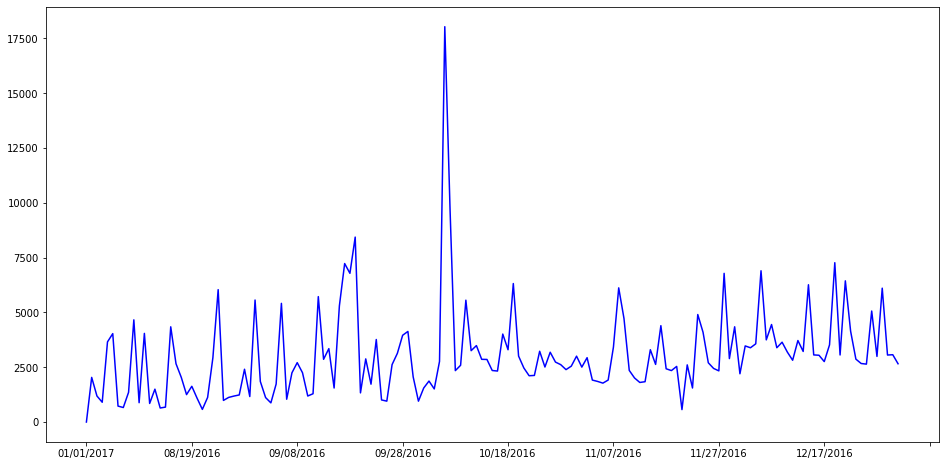

In [146]:
# Count the number of times a date appears and convert to dataframe
tweet_trend = pd.DataFrame(tr_en_msk['publish_date_Only'].value_counts())

# index is date, columns indicate tweet count on that day
tweet_trend.columns = ['tweet_count']

# sort the dataframe by the dates to have them in order
tweet_trend.sort_index(ascending = True, inplace = True)

# plot
tweet_trend['tweet_count'].plot(x=tr_eng['publish_date_Only'].unique(),linestyle = "-", figsize = (16,8), color = 'blue')

# plt.xlabel('Date', fontsize = 13)
# plt.ylabel('Tweet Count', fontsize = 13)

In [ ]:
# Do same plot for Russians and compare

In [ ]:
# Do the moving 30 average and Trump important dates

In [ ]:
# Evaluate top 10 Users over time

In [97]:
# grid=[x for x in ordered_dates]
# graphs=store_
# plt.figure(figsize=(12,8))
# for gg,graph in enumerate(graphs):
#         plt.plot(grid,graph,label=ppp.loc[:,'Country'].unique()[gg])
                
# plt.ylabel('Sales Total '+ '('+u'\u00A3'+')',size=25)
# plt.title('October 2011 Sales By Country/day',size=25)
# plt.legend(loc="upper left")
# plt.xticks(ppp.loc[:,'Date'].unique(),rotation=45,ha="right",size=9)
# plt.grid(True)
# plt.show()

# <font color=red>Like</font>, Share &

# <font color=red>SUB</font>scribe

<font size=5>**`Help Support The Channel: Patreon @mrfugudatasci`**</font>
    
**`Or Consider: Buy Me A Coffee @mrfugudatasci`**

# `Citations & Help:`

# ◔̯◔

`Batch Language Translating Google`

https://cloud.google.com/translate/docs/advanced/batch-translation#translate_v3_batch_translate_text-python

https://builtvisible.com/rapid-bulk-translation-in-excel-with-the-google-translate-api/

https://www.dataquest.io/blog/settingwithcopywarning/ (dealing with pandas warning above)

https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates